# Tarea 4
### Juan Esteban Arboleda
### Luccas Rojas

# 1. Carga de los archivos 

In [1]:
import os
import pandas as pd
import numpy as np
import gensim
import re
import nltk
from gensim.models import KeyedVectors
from IPython.display import display_html
import pandas as pd

In [2]:
shakespeare = '../data/Shakespeare'
jane_austen = '../data/JaneAusten'
lovecraft = '../data/Lovecraft'

def load_books(path):
    """
    Carga los libros de un autor y los devuelve en una lista
    Params:
    ------
    path: str
        Path de la carpeta que contiene los libros
    Returns:
    -------
    books: list
        Lista de strings, cada uno representa un libro
    """
    books = []
    book_paths = os.listdir(path)
    for book_path in book_paths:
        book = open(path + '/' + book_path, 'r', encoding='utf-8')
        books.append(book.read())
        book.close()
    return books
shakespeare_books = load_books(shakespeare)
jane_austen_books = load_books(jane_austen)
lovecraft_books = load_books(lovecraft)

books = {'shakespeare': shakespeare_books, 'jane_austen': jane_austen_books, 'lovecraft': lovecraft_books}

In [3]:
def normalize(sentence:str)->str:
    """
    Normalize a sentence by lowercasing it and removing non alphanumeric characters
    Params:
    -------
        sentence: sentence to normalize
    Returns:
    --------
        sentence: normalized sentence
    """

    sentence = re.sub(r"[^(a-zA-Z0-9\s)]", " ", sentence).lower().replace("\n", " ")

    return sentence

for author in books.keys():
    for i in range(len(books[author])):
        books[author][i] = normalize(books[author][i])

In [4]:
def tokenize(document:str)->list:
    """
    Tokenize a document
    Params:
    -------
        document: document to tokenize  
    Returns:
    --------
        tokens: list of tokens
    """
    return gensim.utils.simple_preprocess(document, deacc=True)

books_list =[]
for author in books.keys():
    for book in books[author]:
        books_list.append(tokenize(book))

In [5]:
PATH_EMBEDDINGS_50 = "../models/books_50_l.rojasb_j.arboleda.model"
embeddings_50 = gensim.models.Word2Vec(books_list, vector_size=50, window=3, min_count=2, workers=10)
if not os.path.exists(PATH_EMBEDDINGS_50):
    embeddings_50.train(books_list,total_examples=len(books_list),epochs=30)

    embeddings_50.save(PATH_EMBEDDINGS_50)
    print("Modelo creado y guardado")
else:
    embeddings_50 = gensim.models.Word2Vec.load(PATH_EMBEDDINGS_50)
    print("Modelo cargado")

Modelo cargado


In [6]:
PATH_EMBEDDINGS_100 = "../models/books_100_l.rojasb_j.arboleda.model"
embeddings_100 = gensim.models.Word2Vec(books_list, vector_size=100, window=3, min_count=2, workers=10)
if not os.path.exists(PATH_EMBEDDINGS_100):
    embeddings_100.train(books_list,total_examples=len(books_list),epochs=30)

    embeddings_100.save(PATH_EMBEDDINGS_100)
    print("Modelo creado y guardado")
else:
    embeddings_100 = gensim.models.Word2Vec.load(PATH_EMBEDDINGS_100)
    print("Modelo cargado")

Modelo cargado


In [7]:
PATH_EMBEDDINGS_150 = "../models/books_150_l.rojasb_j.arboleda.model"
embeddings_150 = gensim.models.Word2Vec(books_list, vector_size=150, window=3, min_count=2, workers=10)
if not os.path.exists(PATH_EMBEDDINGS_150):
    embeddings_150.train(books_list,total_examples=len(books_list),epochs=30)

    embeddings_150.save(PATH_EMBEDDINGS_150)
    print("Modelo creado y guardado")
else:
    embeddings_150 = gensim.models.Word2Vec.load(PATH_EMBEDDINGS_150)
    print("Modelo cargado")

Modelo creado y guardado


# 2. Visualizacion

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_word_embeddings(model, words_to_visualize, perplexity=30):
    """
    Visualize word embeddings using TSNE in a 2D space
    Params:
    -------
        model: gensim word2vec model
        words_to_visualize: list of words to visualize
    Returns:   
    --------
        None
    """

    similar_words = {search_term: model.wv.most_similar(search_term, topn=5)
                   for search_term in words_to_visualize}
    
    words = sum([[k] + [v[0] for v in similar_words[k]] for k in similar_words.keys()], [])
    word_vectors = np.array([model.wv[word] for word in words])

    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=perplexity)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(word_vectors)
    labels = words

    plt.figure(figsize=(14, 8))
    plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [9]:
main_characters = [
    "hamlet", "romeo", "juliet", "macbeth", "darcy", "elizabeth",
    "emma", "cthulhu", "dyer", "wilbur"
]
words = ['man', 'queen', 'king', 'queen']

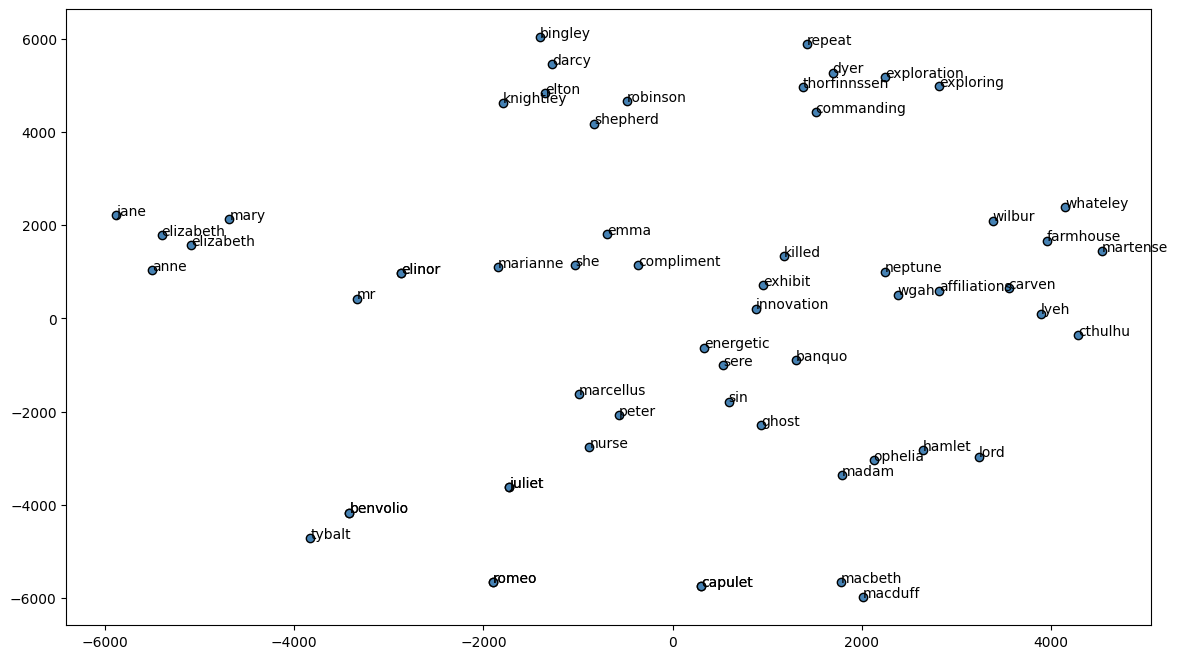

In [10]:
visualize_word_embeddings(embeddings_50, main_characters, perplexity=3)

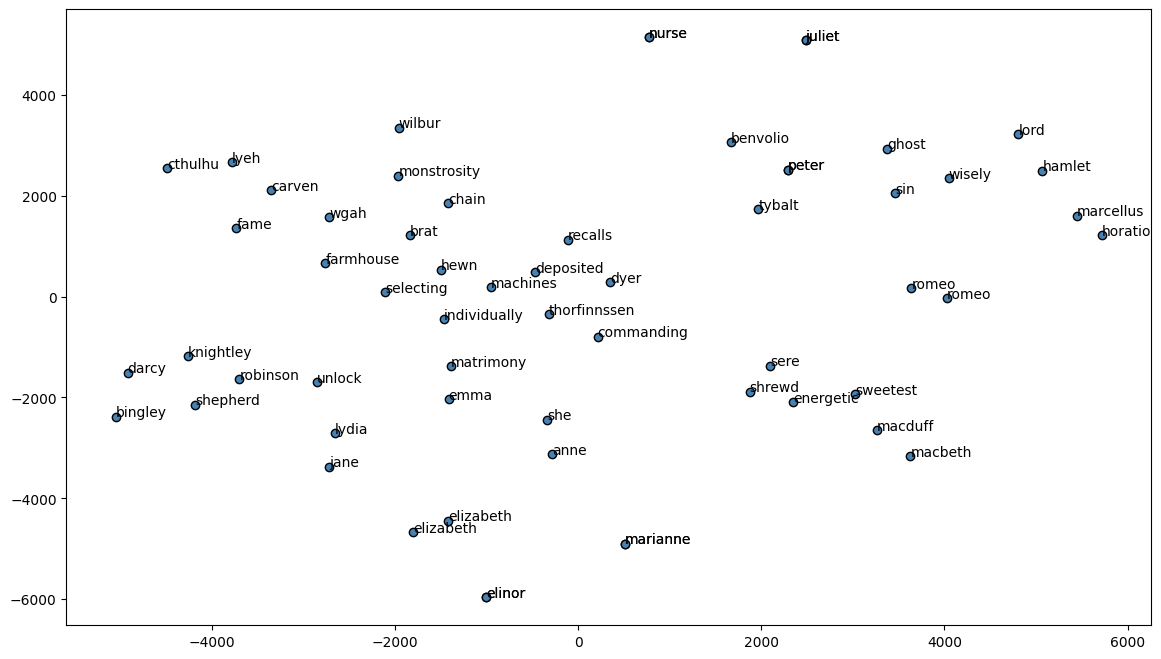

In [11]:
visualize_word_embeddings(embeddings_100, main_characters, perplexity=5)

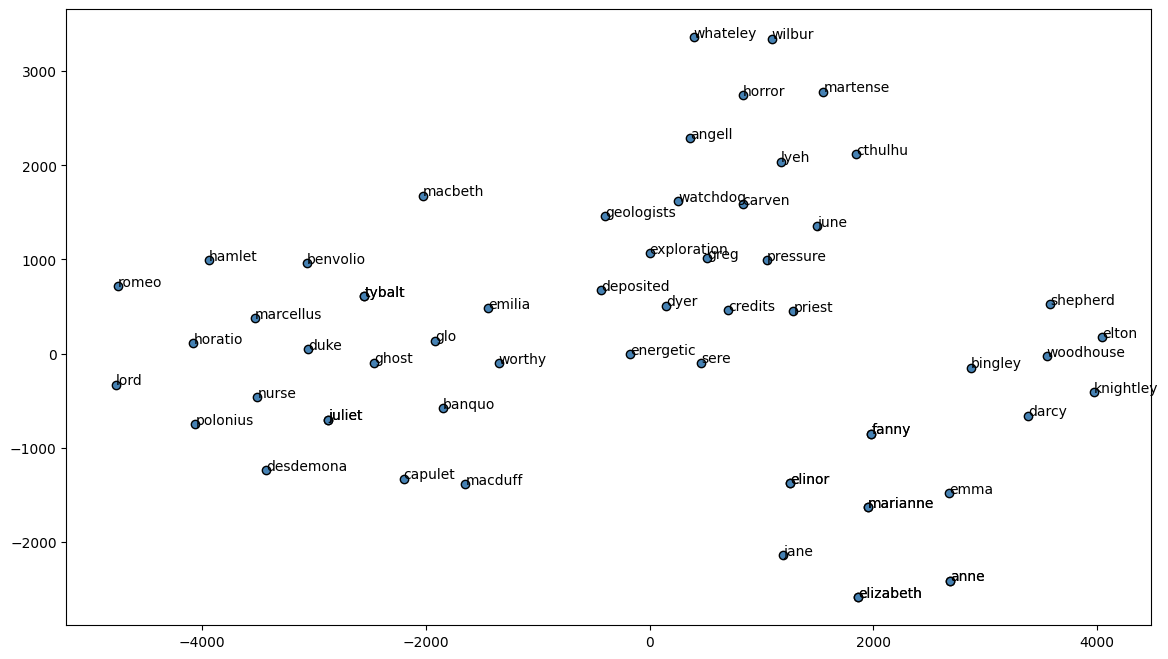

In [12]:
visualize_word_embeddings(embeddings_150, main_characters, perplexity=20)

## 2.1 Relaciones analogas

In [13]:
embeddings_50.wv.most_similar('man', topn=5)

[('woman', 0.5431728959083557),
 ('gentlewoman', 0.5114425420761108),
 ('guess', 0.508904755115509),
 ('commiseration', 0.4959394931793213),
 ('name', 0.49462807178497314)]

In [38]:
relation = embeddings_50.wv['king']-embeddings_50.wv['queen']+embeddings_50.wv['woman']
embeddings_50.wv.most_similar([relation], topn=3)

[('woman', 0.7408416271209717),
 ('man', 0.5643041133880615),
 ('fellow', 0.5510460734367371)]

In [39]:
relation = embeddings_50.wv['good']-embeddings_50.wv['bad']+embeddings_50.wv['evil']
embeddings_50.wv.most_similar([relation], topn=3)

[('good', 0.7663882970809937),
 ('excellent', 0.5535761713981628),
 ('staircase', 0.5423007607460022)]

In [16]:
relation = embeddings_50.wv['woman']-embeddings_50.wv['women']+embeddings_50.wv['men']
embeddings_50.wv.most_similar([relation], topn=3)

[('men', 0.7369264364242554),
 ('woman', 0.6343454122543335),
 ('ladies', 0.41994601488113403)]

In [40]:
relation = embeddings_50.wv['father']-embeddings_50.wv['girl']+embeddings_50.wv['boy']
embeddings_50.wv.most_similar([relation], topn=3)

[('father', 0.6909568309783936),
 ('nunckle', 0.5201886892318726),
 ('backe', 0.5082591772079468)]

In [41]:
relation = embeddings_50.wv['nurse']-embeddings_50.wv['duke']+embeddings_50.wv['king']
embeddings_50.wv.most_similar([relation], topn=3)

[('nurse', 0.7078638672828674),
 ('polonius', 0.6308462619781494),
 ('king', 0.6087873578071594)]

In [43]:
relation = embeddings_50.wv['king']-embeddings_50.wv['crown']+embeddings_50.wv['sword']
embeddings_50.wv.most_similar([relation], topn=3)

[('king', 0.813482940196991),
 ('sword', 0.7752278447151184),
 ('master', 0.5897806882858276)]

In [44]:
relation = embeddings_50.wv['sea']-embeddings_50.wv['water']+embeddings_50.wv['fire']
embeddings_50.wv.most_similar([relation], topn=3)

[('fire', 0.7027614116668701),
 ('begins', 0.592934787273407),
 ('locks', 0.5743384957313538)]

In [45]:
relation = embeddings_50.wv['peace']-embeddings_50.wv['war']+embeddings_50.wv['love']
embeddings_50.wv.most_similar([relation], topn=3)

[('love', 0.8311580419540405),
 ('heart', 0.5989972352981567),
 ('imitate', 0.5631320476531982)]

In [47]:
relation = embeddings_50.wv['death']-embeddings_50.wv['life']+embeddings_50.wv['eternity']
embeddings_50.wv.most_similar([relation], topn=3)

[('bell', 0.5622714161872864),
 ('death', 0.5225468873977661),
 ('gonzago', 0.5149056315422058)]

In [48]:
relation = embeddings_50.wv['clear']-embeddings_50.wv['day']+embeddings_50.wv['night']
embeddings_50.wv.most_similar([relation], topn=3)

[('clear', 0.5265791416168213),
 ('brisk', 0.49008888006210327),
 ('night', 0.4683160185813904)]

In [49]:
relation = embeddings_50.wv['good']-embeddings_50.wv['bad']+embeddings_50.wv['hate']
embeddings_50.wv.most_similar([relation], topn=3)

[('good', 0.761672854423523),
 ('dress', 0.48816320300102234),
 ('thoughts', 0.4826633334159851)]

# 3.Creacion del dataset

In [18]:
def create_dataset(auth_1:list, auth_2:list, auth_3:list, sentence_len:int=150):
    """
    Create a dataset with the books of the three authors
    Params:
    -------
        auth_1: list of books of the first author
        auth_2: list of books of the second author
        auth_3: list of books of the third author
        sentence_len: length of the sentences to create
    Returns:
    --------
        dataset: pandas dataframe with the sentences and the author
    """
    data_frame = pd.DataFrame(columns=['fragment', 'author'])
    for book in auth_1:
        tokenized_book = tokenize(book)
        num_words = len(tokenized_book)
        j = sentence_len
        while j < num_words:
            df = pd.DataFrame({'fragment': [tokenized_book[j-sentence_len:j]], 'author': 0})
            data_frame = pd.concat([data_frame, df], ignore_index=True)
            j += sentence_len//4
    for book in auth_2:
        tokenized_book = tokenize(book)
        num_words = len(tokenized_book)
        j = sentence_len
        while j < num_words:
            df = pd.DataFrame({'fragment': [tokenized_book[j-sentence_len:j]], 'author': 1})
            data_frame = pd.concat([data_frame, df], ignore_index=True)
            j += sentence_len
    for book in auth_3:
        tokenized_book = tokenize(book)
        num_words = len(tokenized_book)
        j = sentence_len
        while j < num_words:
            df = pd.DataFrame({'fragment': [tokenized_book[j-sentence_len:j]], 'author': 2})
            data_frame = pd.concat([data_frame, df], ignore_index=True)
            j += sentence_len//4
    return data_frame
sentence_len = 150
dataset = create_dataset(shakespeare_books, jane_austen_books, lovecraft_books, sentence_len=sentence_len)

In [19]:
dataset

,fragment,author
0,"[hamlet, prince, of, denmark, author, william,...",0
1,"[barnardo, barnardo, he, francisco, you, come,...",0
2,"[you, had, quiet, guard, francisco, not, mouse...",0
3,"[ho, who, is, there, horatio, friends, to, thi...",0
4,"[exit, marcellus, holla, barnardo, barnardo, s...",0
...,...,...
9872,"[but, that, had, mostly, to, do, with, the, pl...",2
9873,"[not, he, declares, anything, connected, with,...",2
9874,"[of, those, other, violet, westward, mountains...",2
9875,"[with, five, dimensions, the, nameless, cylind...",2


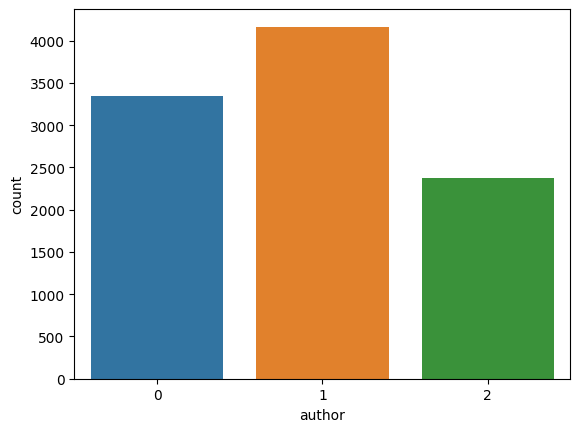

In [20]:
import seaborn as sns

ax = sns.countplot(x="author", data=dataset)

## 3.1 Particion de los datos en train, validation y test

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
list(embeddings_50.wv.key_to_index.keys())
vocab = [[word] for word  in list(embeddings_50.wv.key_to_index.keys())]
tokenizer.fit_on_texts(vocab)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

14452

In [22]:
embedding_matrix_50 = np.zeros((vocab_size, 50))  # Inicializa con ceros
for word, i in tokenizer.word_index.items():
    if word in embeddings_50.wv:  # Verifica si la palabra está en los embeddings de Gensim
        embedding_matrix_50[i] = embeddings_50.wv[word]
embedding_matrix_100 = np.zeros((vocab_size, 100))  # Inicializa con ceros
for word, i in tokenizer.word_index.items():
    if word in embeddings_100.wv:  # Verifica si la palabra está en los embeddings de Gensim
        embedding_matrix_100[i] = embeddings_100.wv[word]
embedding_matrix_150 = np.zeros((vocab_size, 150))  # Inicializa con ceros
for word, i in tokenizer.word_index.items():
    if word in embeddings_150.wv:  # Verifica si la palabra está en los embeddings de Gensim
        embedding_matrix_150[i] = embeddings_150.wv[word]

In [23]:
from keras_preprocessing.sequence import pad_sequences
dataset.dropna(inplace=True, axis=0)
dataset['sequence'] = tokenizer.texts_to_sequences(dataset['fragment'])
dataset['sequence'] = np.asarray(pad_sequences(dataset['sequence'], maxlen=sentence_len, padding='post'), dtype='float32')
dataset['author'] = dataset['author'].apply(lambda x: np.asarray(x).astype(np.float32))

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(dataset['sequence'], dataset['author'], test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50)


# 3.2 Arquitectura #1 LSTM de 100
## 3.2.1 Arquitectura #1 con embeddings de tamaño 50

In [25]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [26]:
input_len = sentence_len 

model = Sequential()
# Add input embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim = 50, weights=[embedding_matrix_50], input_length=sentence_len, trainable=False))
# Add LSTM layer
model.add(LSTM(100))
model.add(Dropout(0.3))
# Add output layer
model.add(Dense(3, activation='softmax'))


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           722600    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 783303 (2.99 MB)
Trainable params: 60703 (237.12 KB)
Non-trainable params: 722600 (2.76 MB)
_________________________________________________________________


In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=30, verbose=1)

Epoch 1/30
217/217 [==============================] - 4s 7ms/step - loss: 0.9481 - accuracy: 0.5498 - val_loss: 0.9182 - val_accuracy: 0.5762
Epoch 2/30
217/217 [==============================] - 1s 6ms/step - loss: 0.8975 - accuracy: 0.5766 - val_loss: 0.9141 - val_accuracy: 0.5709
Epoch 3/30
217/217 [==============================] - 1s 5ms/step - loss: 0.8833 - accuracy: 0.5856 - val_loss: 0.9120 - val_accuracy: 0.5742
Epoch 4/30
217/217 [==============================] - 1s 4ms/step - loss: 0.8759 - accuracy: 0.5814 - val_loss: 0.9095 - val_accuracy: 0.5668
Epoch 5/30
217/217 [==============================] - 1s 5ms/step - loss: 0.8709 - accuracy: 0.5846 - val_loss: 0.9116 - val_accuracy: 0.5769
Epoch 6/30
217/217 [==============================] - 1s 6ms/step - loss: 0.8677 - accuracy: 0.5883 - val_loss: 0.9070 - val_accuracy: 0.5749
Epoch 7/30
217/217 [==============================] - 1s 4ms/step - loss: 0.8643 - accuracy: 0.5899 - val_loss: 0.9104 - val_accuracy: 0.5749
Epoch 

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)

47/47 [==============================] - 1s 2ms/step
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.67      0.48      0.56       515
         1.0       0.55      0.77      0.64       622
         2.0       0.53      0.36      0.43       345

    accuracy                           0.58      1482
   macro avg       0.58      0.54      0.54      1482
weighted avg       0.59      0.58      0.56      1482



## 3.2.2 Arquitectura #1 con embeddings de tamaño 100

In [30]:
input_len = sentence_len 

model = Sequential()
# Add input embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim = 100, weights=[embedding_matrix_100], input_length=sentence_len, trainable=False))
# Add LSTM layer
model.add(LSTM(100))
model.add(Dropout(0.3))
# Add output layer
model.add(Dense(3, activation='softmax'))

In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=30, verbose=1)

Epoch 1/30
217/217 [==============================] - 4s 7ms/step - loss: 0.9552 - accuracy: 0.5396 - val_loss: 0.9140 - val_accuracy: 0.5688
Epoch 2/30
217/217 [==============================] - 1s 5ms/step - loss: 0.8967 - accuracy: 0.5760 - val_loss: 0.9050 - val_accuracy: 0.5749
Epoch 3/30
217/217 [==============================] - 1s 5ms/step - loss: 0.8836 - accuracy: 0.5818 - val_loss: 0.9053 - val_accuracy: 0.5796
Epoch 4/30
217/217 [==============================] - 1s 5ms/step - loss: 0.8708 - accuracy: 0.5851 - val_loss: 0.9118 - val_accuracy: 0.5682
Epoch 5/30
217/217 [==============================] - 1s 5ms/step - loss: 0.8633 - accuracy: 0.5880 - val_loss: 0.9090 - val_accuracy: 0.5702
Epoch 6/30
217/217 [==============================] - 1s 6ms/step - loss: 0.8588 - accuracy: 0.5918 - val_loss: 0.9068 - val_accuracy: 0.5675
Epoch 7/30
217/217 [==============================] - 1s 5ms/step - loss: 0.8521 - accuracy: 0.5906 - val_loss: 0.9124 - val_accuracy: 0.5769
Epoch 

In [32]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)

47/47 [==============================] - 1s 2ms/step
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.66      0.48      0.55       515
         1.0       0.56      0.75      0.64       622
         2.0       0.48      0.36      0.41       345

    accuracy                           0.57      1482
   macro avg       0.56      0.53      0.54      1482
weighted avg       0.57      0.57      0.56      1482



## 3.2.3 Arquitectura #1 con embeddings de tamaño 150

In [33]:
input_len = sentence_len 

model = Sequential()
# Add input embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim = 150, weights=[embedding_matrix_150], input_length=sentence_len, trainable=False))
# Add LSTM layer
model.add(LSTM(100))
model.add(Dropout(0.3))
# Add output layer
model.add(Dense(3, activation='softmax'))

In [34]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)

47/47 [==============================] - 1s 2ms/step
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.31      0.41      0.35       515
         1.0       0.39      0.26      0.31       622
         2.0       0.23      0.26      0.24       345

    accuracy                           0.31      1482
   macro avg       0.31      0.31      0.30      1482
weighted avg       0.32      0.31      0.31      1482

